In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# lodaing data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

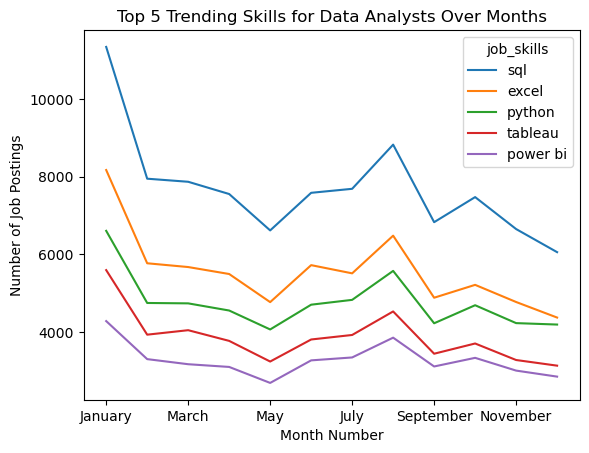

In [2]:
import calendar

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: calendar.month_name[x])
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns=['job_posted_month_no'])

df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Trending Skills for Data Analysts Over Months')
plt.xlabel('Month Number')
plt.ylabel('Number of Job Postings')
plt.show()

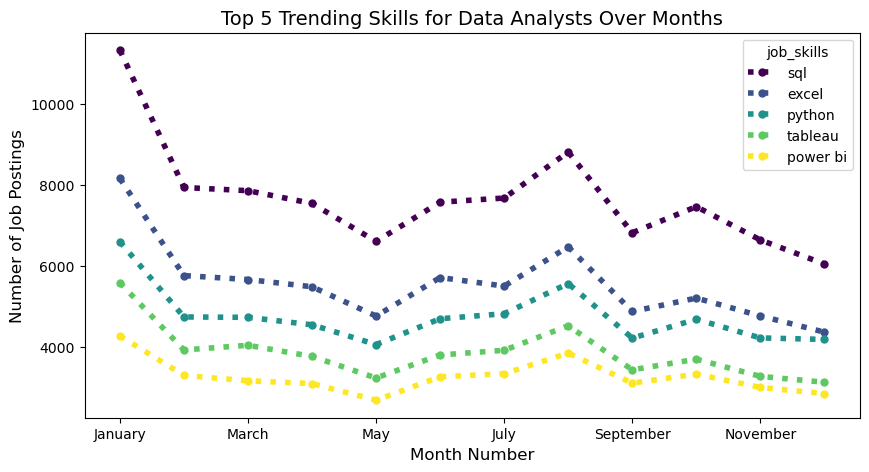

In [3]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':',
    colormap='viridis',
    marker='o',
    markersize=5,
    figsize=(10, 5)
    )


plt.title('Top 5 Trending Skills for Data Analysts Over Months', fontsize=14)
plt.xlabel('Month Number', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.show()

In [4]:
df_DA_explode = df_DA.explode('job_skills')

skill_stats = df_DA_explode.groupby('job_skills').agg(
    job_postings=('job_skills', 'size'),
    avg_salary=('salary_year_avg', 'mean')
)

skill_count = 20
skill_stats = skill_stats.sort_values(by='job_postings', ascending=False).head(skill_count)

skill_stats


,job_postings,avg_salary
job_skills,,
sql,92428,96401.885253
excel,66860,86381.646238
python,57190,101457.315231
tableau,46455,98020.038940
power bi,39380,92254.561079
r,29996,98698.165628
sas,27998,93715.551900
powerpoint,13822,88364.127700
word,13562,82617.277650


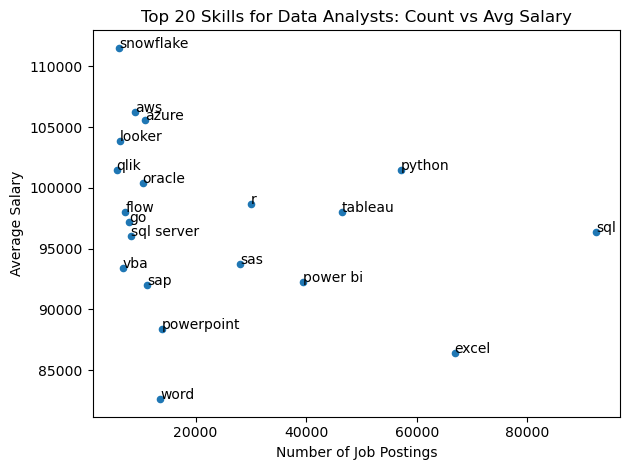

In [5]:
skill_stats.plot(kind='scatter', x='job_postings', y='avg_salary')

plt.title('Top 20 Skills for Data Analysts: Count vs Avg Salary')
plt.xlabel('Number of Job Postings')
plt.ylabel('Average Salary')
plt.tight_layout()

# annotate points with skill names
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['job_postings'].iloc[i], skill_stats['avg_salary'].iloc[i], txt)

plt.show()


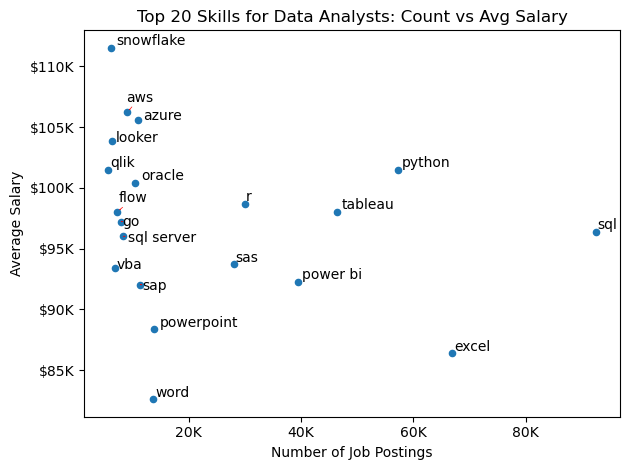

In [21]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='job_postings', y='avg_salary')

texts = []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['job_postings'].iloc[i], skill_stats['avg_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.title('Top 20 Skills for Data Analysts: Count vs Avg Salary')
plt.xlabel('Number of Job Postings')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()
